Working with the Iris dataset and creating an SVM classifier to distinguish Iris-Setosa and Iris-Virginica samples:

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_iris
import pandas as pd


In [4]:
# load the data
iris = datasets.load_iris(as_frame=True)

# keep the sepal-length and sepal-width features
X = iris.data[["sepal length (cm)", "sepal width (cm)"]].values
y = iris.target

# keep the setosa and virginica samples
setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]

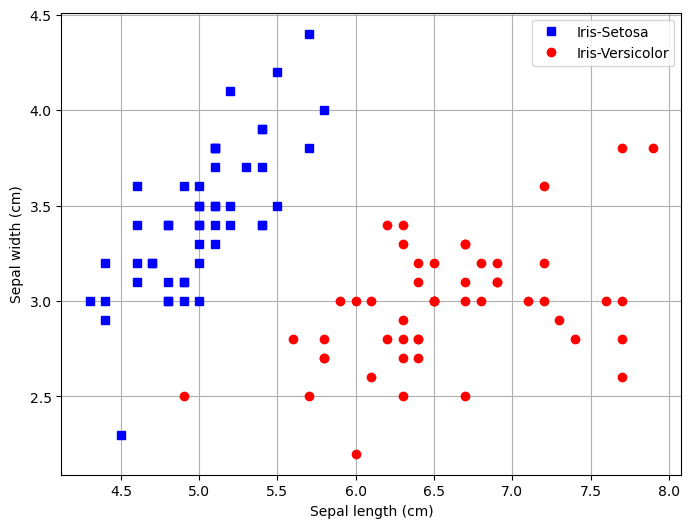

In [5]:
import matplotlib.pyplot as plt

# visualize the data
fig = plt.figure(figsize=(8,6))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Iris-Versicolor")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.grid()
plt.show()

In [6]:
# define a function that draws the decision boundary of a given SVM classifier
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

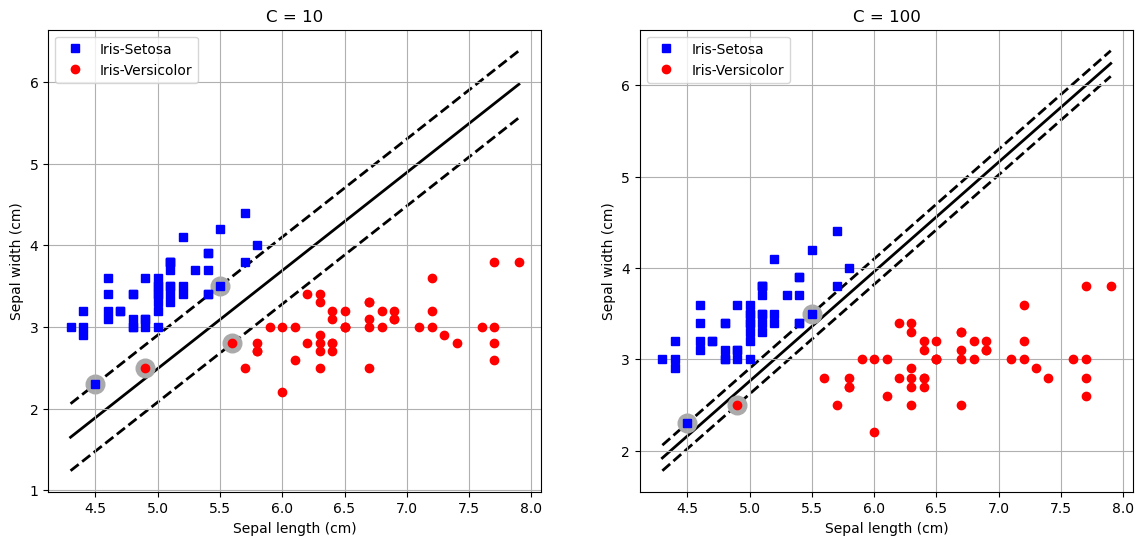

In [7]:
import numpy as np
from sklearn.svm import SVC

# train an SVM classifier with linear kernel and C = 10
svm_clf10 = SVC(kernel="linear", C=10)
svm_clf10.fit(X, y)

# train an SVM classifier with linear kernel and C = 100
svm_clf100 = SVC(kernel="linear", C=100)
svm_clf100.fit(X, y)

# visualize our results
fig = plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.title("C = 10")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Iris-Versicolor")

# plot the decision boundary for C=10
plot_svc_decision_boundary(svm_clf10, min(X[:,0]), max(X[:,0]))
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("C = 100")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Iris-Versicolor")

# plot the decision boundary for C=100
plot_svc_decision_boundary(svm_clf100, min(X[:,0]), max(X[:,0]))

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.grid()
plt.show()

As we increase the value of the hyperparameter, the street gets narrower and vice versa. In our current paradigm, both models perform the
same as an in, there doesn't seems to be any difference in classification of the two different flowers. In theory, as we increase the
hyperparameter value we deem to get a more overfit model, while if we do otherwise we get an undefit model. Final thoughts: I would rather
select the model with C = 10 over the other, because it better generalizes over the data at hand.

In [8]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, random_state=42)

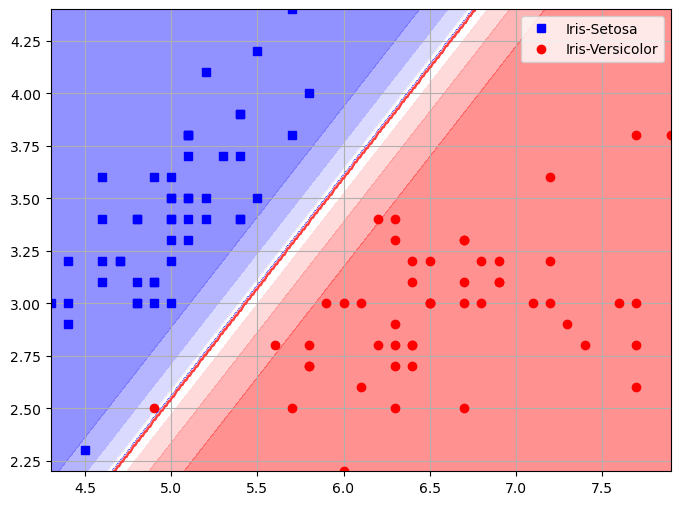

In [9]:
lengths, widths = np.meshgrid(np.linspace(min(X[:,0]), max(X[:,0]), 500).reshape(-1, 1),
                              np.linspace(min(X[:,1]), max(X[:,1]), 200).reshape(-1, 1))

X_new = np.c_[lengths.ravel(), widths.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

probs = y_proba[:, 1].reshape(lengths.shape)
classes = y_predict.reshape(lengths.shape)

plt.figure(figsize=(8, 6))

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Iris-Versicolor")

plt.contourf(lengths, widths, probs, alpha=0.5, cmap="bwr")
contour = plt.contour(lengths, widths, classes, cmap="bwr")

plt.legend()
plt.grid()
plt.show()